In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


## Before Normalization

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
svm_classifier = SVC(kernel='linear')  

svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
y_pred = svm_classifier.predict(X_test)


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average micro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='micro'))
print("Recall = ", recall_score(y_test, y_pred,average='micro'))
print("F1-score = ", f1_score(y_test, y_pred,average='micro'))
print("Confusion Matrix = ")
print(confusion_matrix(y_test, y_pred))
print ("********")
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy =  87.32394366197182 %
Precision =  0.8732394366197183
Recall =  0.8732394366197183
F1-score =  0.8732394366197183
Confusion Matrix = 
[[316  15   2]
 [ 23  34   7]
 [  2   5  22]]
********
Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       333
         2.0       0.63      0.53      0.58        64
         3.0       0.71      0.76      0.73        29

    accuracy                           0.87       426
   macro avg       0.76      0.75      0.75       426
weighted avg       0.87      0.87      0.87       426



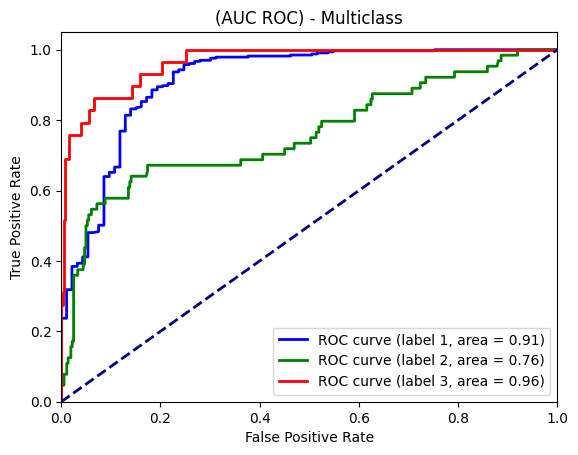

In [8]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize



y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_scores = svm_classifier.decision_function(X_test)
plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


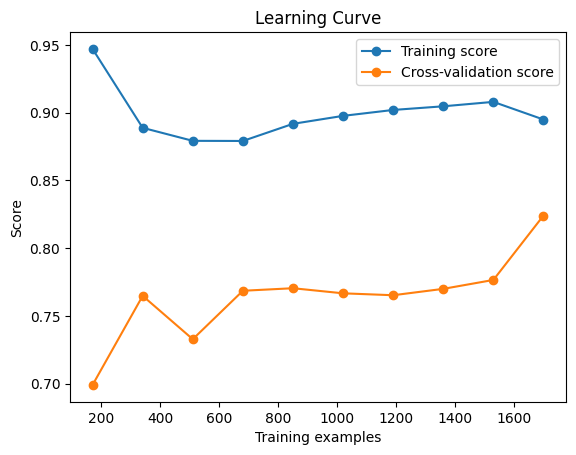

In [9]:
train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [10]:
# data set had negative value, using log transform to make positive and Adding 1 in X, to prevent log value as infinite

X_log_transformed = np.log1p(X + 1)

kbest = SelectKBest(score_func=chi2, k=5)
X_new = kbest.fit_transform(X_log_transformed, y)


In [11]:
feature_scores = kbest.scores_
print("Feature Importance Scores:")
print(feature_scores)

Feature Importance Scores:
[2.61919200e-01 1.77368755e-03 1.52940324e-02 5.36050691e-04
 3.95730127e-04 6.56463269e-08 8.59609816e-05 1.68957195e+01
 1.45339333e+01 5.29494011e+02 4.23579355e+01 1.72531418e+01
 3.22287127e+00 1.27957858e-02 5.13797999e+00 5.46795895e-01
 1.72059243e+00 1.58334943e+00 1.05026330e+00 1.21194002e+02
 1.18517227e+01]


## After Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


In [14]:
svm_after_normalization = SVC(kernel='linear') 
svm_after_normalization.fit(X_train, y_train)
y_pred = svm_after_normalization.predict(X_test)


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average micro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='micro'))
print("Recall = ", recall_score(y_test, y_pred,average='micro'))
print("F1-score = ", f1_score(y_test, y_pred,average='micro'))
print("Confusion Matrix = ")
print(confusion_matrix(y_test, y_pred))
print ("********")
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy =  88.73239436619718 %
Precision =  0.8873239436619719
Recall =  0.8873239436619719
F1-score =  0.8873239436619719
Confusion Matrix = 
[[317  14   2]
 [ 21  41   2]
 [  3   6  20]]
********
Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       333
         2.0       0.67      0.64      0.66        64
         3.0       0.83      0.69      0.75        29

    accuracy                           0.89       426
   macro avg       0.81      0.76      0.78       426
weighted avg       0.88      0.89      0.89       426



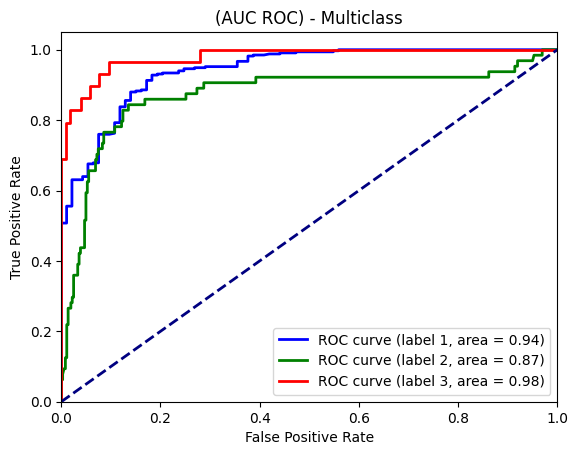

In [16]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_scores = svm_after_normalization.decision_function(X_test)
plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm_after_normalization, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [ ]:
# data set had negative value, using log transform to make positive and Adding 1 in X, to prevent log value as infinite

X_log_transformed = np.log1p(X + 1)

kbest = SelectKBest(score_func=chi2, k=5)
X_new = kbest.fit_transform(X_log_transformed, y)


In [ ]:
feature_scores = kbest.scores_
print("Feature Importance Scores:")
print(feature_scores)